## Example of usage

### It should work at any place, if path to the lib is correct

In [1]:
#lib_path = 'ENTER PATH TO THE LIB'
lib_path = '/home/dpreer/Polarwind/masslib'
# or it's possible to use relative path
# lib_path = 'Polarwind/masslib'

In [2]:
import sys
sys.path.insert(1, lib_path)
from mass import MassSpectrum

/home/dpreer/Polarwind/masslib/mass.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


### Usage example for isotope distribution generator:

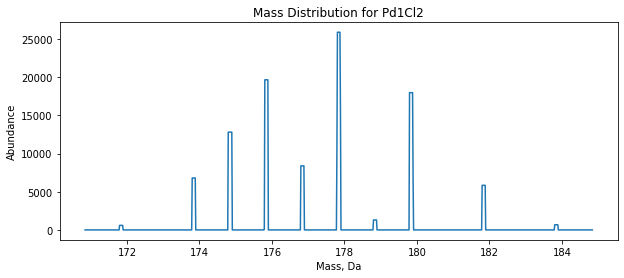

In [3]:
from distribution_generation.mass_distribution import IsotopeDistribution

# brutto formulae that we want to use
brutto = {"Pd": 1, "Cl": 2}

# instance initialization
d = IsotopeDistribution(brutto)

# masses generations
d.generate_iterations(100000)

# plotting obtained distribution
d.draw()

# Graph can be saved by plt.savefig(filename, "png")
# For that import matplotlib.pyplot as plt is needed

### Usage for Arithmetic operations over assigned spectra

In [4]:
# imports
import os

import settings
from mass import MassSpectrum

#
masses = []
mapper = {"mw": "mass", "relativeAbundance": "I"}
for filename in sorted(os.listdir(settings.DATA_FOLDER)):
    masses.append(MassSpectrum().load(
        f"{settings.DATA_FOLDER}/{filename}",
        mapper=mapper,
        sep=',',
        ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
    ))
    
x, y, z = masses[:3]

union = (x + y + z)
print(len(union > 2))  # intersection of all three
print(len(union > 1))  # number of bruttos which is presented at least 2 out of 3 spectra

for i in [x, y, z]:
    print(union.calculate_jaccard_needham_score(i))

# deleting common for all 3 spectra
x -= (union > 2)
y -= (union > 2)
z -= (union > 2)

1269
2317
0.7203480113636364
0.3174715909090909
0.5988991477272727


### Usage for Spectrum Assignment

In [5]:
import time
import pandas as pd
from mass import MassSpectrum

gen_brutto = pd.read_csv(f"{lib_path}/brutto_generator/C_H_O_N_S.csv", sep=";")

mapper = {"mw": "mass", "relativeAbundance": "I"}

T = time.time()

# in one expression we run:
# created instance of a mass spectrum
# load mass spectrum
# assign
# dropping unassigned bruttos
ms = MassSpectrum().load(
    f"{lib_path}/data/a_1.csv",
    mapper,
    sep=',',
    ignore_columns=["peakNo", "errorPPM", "DBE", "class", "C", "H", "O", "N", "S", "z"]
).assign(gen_brutto, elems=list("CHONS")).drop_unassigned()

print(time.time() - T)

17.774189233779907


### Usage to plot similarity matrix

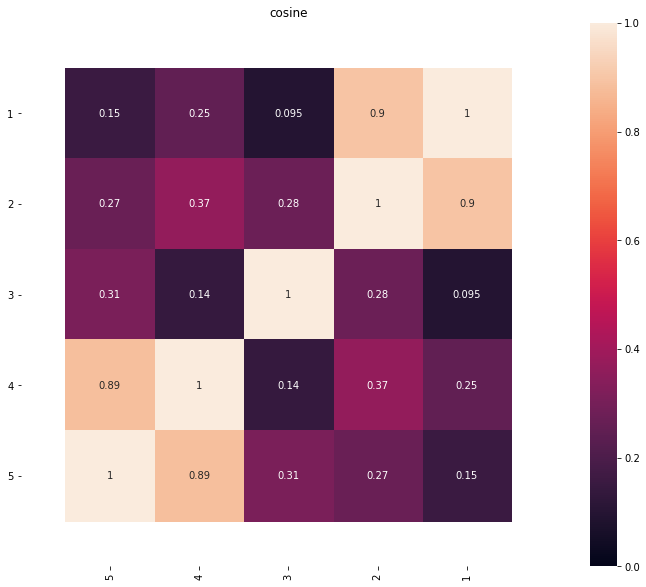

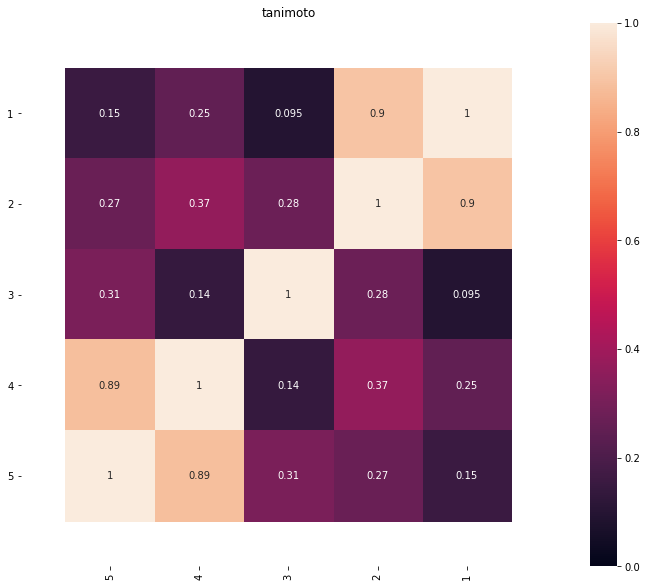

In [6]:
import os

import matplotlib.pyplot as plt

from mass import MassSpectrum, MassSpectrumList

# load data
masses = []
mapper = {"mw": "mass", "relativeAbundance": "I", "formula":"brutto"}
for filename in sorted(os.listdir(f"{lib_path}/data"))[:5]:
    masses.append(MassSpectrum().load(
        f"{lib_path}/data/{filename}",
        mapper=mapper,
        sep=',',
        ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
    ).assignment_from_brutto())  # It's important, that similarity can be calculated only by formulae

# MassSpectrumList instance creating, 
collection = MassSpectrumList(masses, names=["1", "2", "3", "4", "5"])

# calculate and draw cosine similarity matrix
plt.figure(figsize=(12, 10))

collection.draw(collection.calculate_similarity(mode="common_correlation"), title="cosine")
plt.show()

# calculate and draw taminoto similarity matrix
plt.figure(figsize=(12, 10))
collection.draw(collection.calculate_similarity(mode="common_correlation"), title="tanimoto")
plt.show()

### Usage for Brutto table generation

In [7]:
import time
from brutto_generator import generate_brutto_formulas
T = time.time()
df = generate_brutto_formulas(
    min_n=(6, 6, 0, 0, 0),
    max_n=(40, 40, 5, 5, 5),
    elems=tuple("CHONS")
)
df.to_csv("test_C_H_O_N_S.csv", sep=";", index=False)
print(time.time() - T)


2.112122058868408
